<a href="https://colab.research.google.com/github/GauravBFG10K/Retail_Sales_Regression-Analysis/blob/main/Rossmann_Sales_Prediction_Regression_Gaurav_Tiwari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [292]:
#importing libraries

import pandas as pd
import numpy as np
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [293]:
#mounting to drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [294]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Data Science/Regression Capstone Project/Rossmann Stores Data.csv', low_memory = False)


In [295]:
#Check the data
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [296]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [298]:
df[["Date"]].value_counts()

Date      
2014-04-17    1115
2014-05-25    1115
2014-05-16    1115
2014-05-17    1115
2014-05-18    1115
              ... 
2014-10-29     935
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-24     935
Length: 942, dtype: int64

In [299]:
df.describe(include = 'all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,986159,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [300]:
len(df[df.duplicated()])

0

In [301]:
df[['Sales','Customers','Open','Promo','Store','DayOfWeek']].isna().value_counts()

Sales  Customers  Open   Promo  Store  DayOfWeek
False  False      False  False  False  False        1017209
dtype: int64

Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


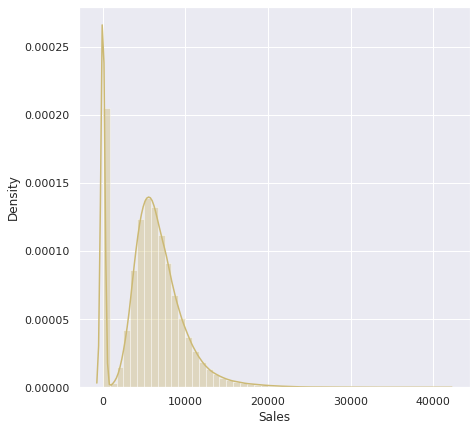

In [302]:
# Dependent variable 'Sales'
plt.figure(figsize=(7,7))

sns.distplot(df['Sales'],color="y")

In [303]:
z = 0
for col in df['Sales']:
  if col == 0:
    z+=1

print(z)

172871


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


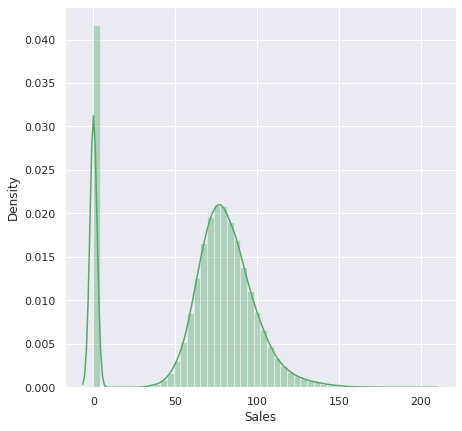

In [304]:
# Dependent variable 'Sales'
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['Sales']),color="g")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


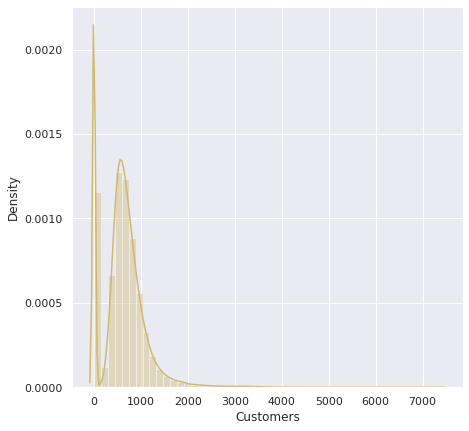

In [305]:
plt.figure(figsize=(7,7))

sns.distplot(df['Customers'],color="y")

In [306]:
df.count()

Store            1017209
DayOfWeek        1017209
Date             1017209
Sales            1017209
Customers        1017209
Open             1017209
Promo            1017209
StateHoliday     1017209
SchoolHoliday    1017209
dtype: int64

In [307]:
indexNames = df[(df['Sales'] == 0) & (df['Customers'] == 0)].index
df.drop(indexNames , inplace=True)
df


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [308]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [309]:
df = df.reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


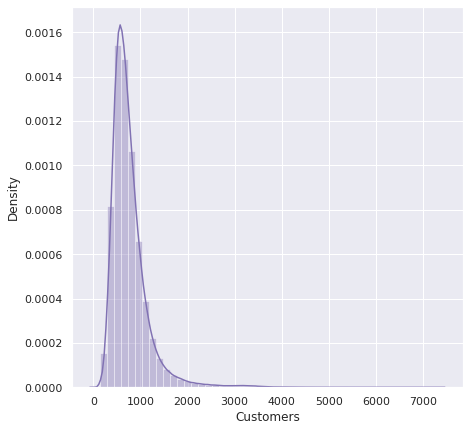

In [310]:
plt.figure(figsize=(7,7))

sns.distplot(df['Customers'],color="m")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


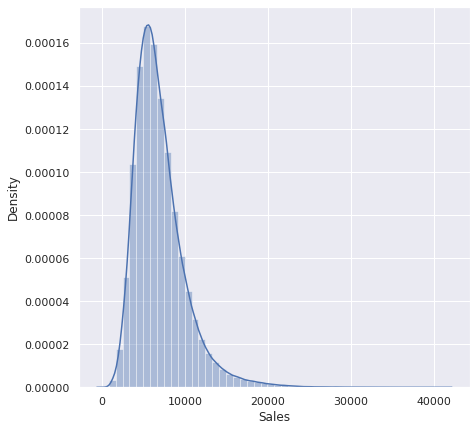

In [311]:
plt.figure(figsize=(7,7))

sns.distplot(df['Sales'],color="b")

In [312]:
df.count()

index            844340
Store            844340
DayOfWeek        844340
Date             844340
Sales            844340
Customers        844340
Open             844340
Promo            844340
StateHoliday     844340
SchoolHoliday    844340
dtype: int64

In [313]:
df.dtypes

index             int64
Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [314]:
nf = df[["SchoolHoliday","Promo","Open","Customers","Sales","DayOfWeek","Store" ]]
nf

,SchoolHoliday,Promo,Open,Customers,Sales,DayOfWeek,Store
0,1,1,1,555,5263,5,1
1,1,1,1,625,6064,5,2
2,1,1,1,821,8314,5,3
3,1,1,1,1498,13995,5,4
4,1,1,1,559,4822,5,5
...,...,...,...,...,...,...,...
844335,1,0,1,566,3375,2,682
844336,1,0,1,2377,10765,2,733
844337,1,0,1,1248,5035,2,769
844338,1,0,1,1039,4491,2,948


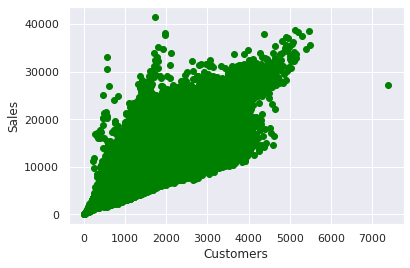

In [315]:
plt.scatter(nf.Customers, nf.Sales,  color='green')
plt.xlabel("Customers")
plt.ylabel("Sales")
plt.show()

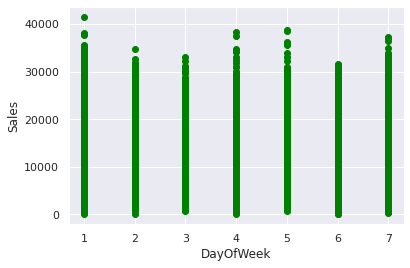

In [316]:
plt.scatter(nf.DayOfWeek, nf.Sales,  color='green')
plt.xlabel("DayOfWeek")
plt.ylabel("Sales")
plt.show()

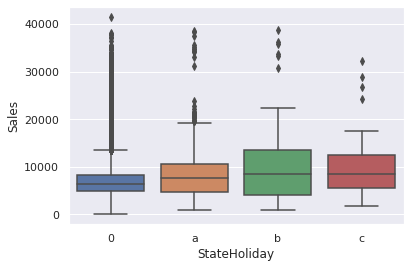

In [317]:
sns.boxplot(x="StateHoliday", y="Sales", data=df)
sns.set(rc = {'figure.figsize':(7,7)})

In [318]:
nf.corr()

,SchoolHoliday,Promo,Open,Customers,Sales,DayOfWeek,Store
SchoolHoliday,1.000000,0.028969,NaN,0.024917,0.038637,-0.139319,0.000525
Promo,0.028969,1.000000,NaN,0.182853,0.368191,-0.289269,-0.000011
Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customers,0.024917,0.182853,NaN,1.000000,0.823553,-0.097264,0.033984
Sales,0.038637,0.368191,NaN,0.823553,1.000000,-0.178750,0.007715
DayOfWeek,-0.139319,-0.289269,NaN,-0.097264,-0.178750,1.000000,0.000342
Store,0.000525,-0.000011,NaN,0.033984,0.007715,0.000342,1.000000


In this table we can observe that customer v/s sales data is highly correlated, whereas other variables not much.

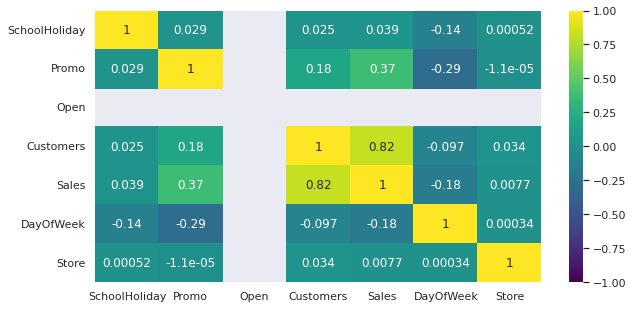

In [319]:
corr_df = nf.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_df, vmin=-1, cmap='viridis', annot=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


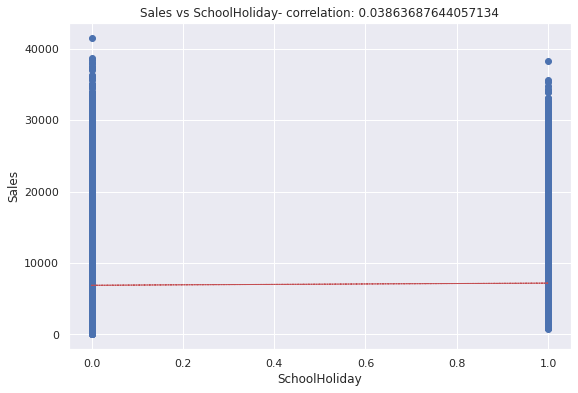

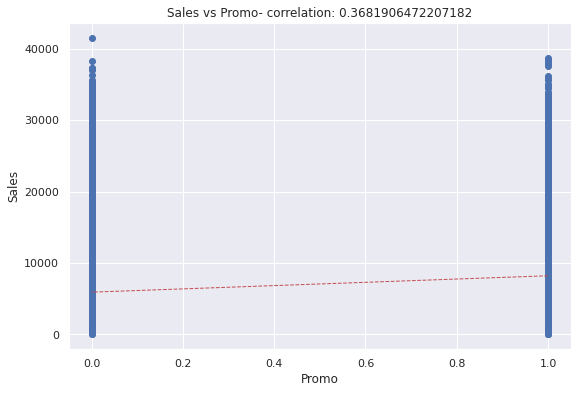

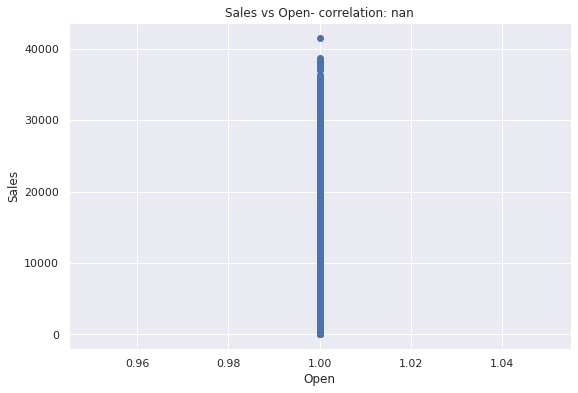

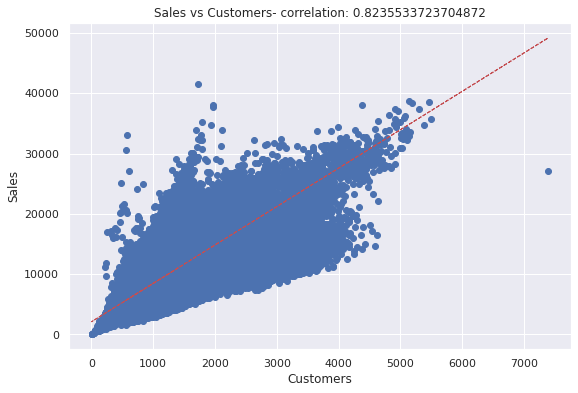

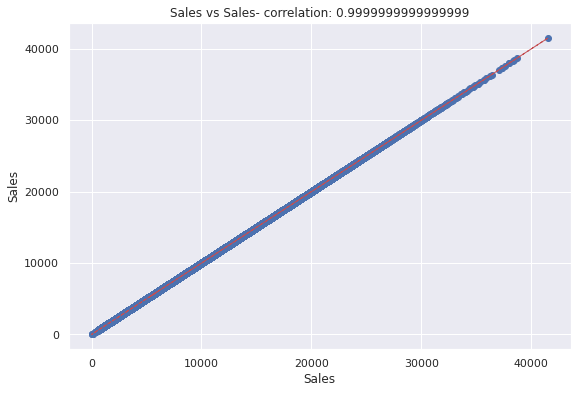

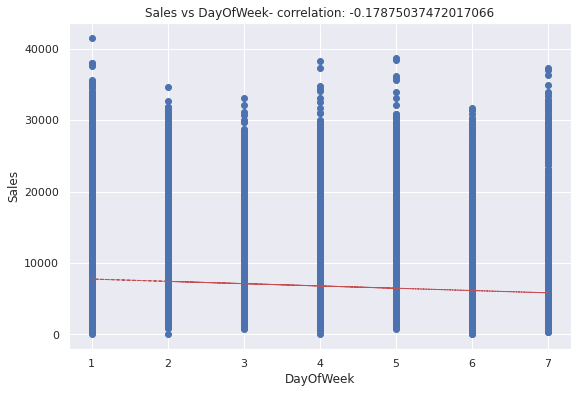

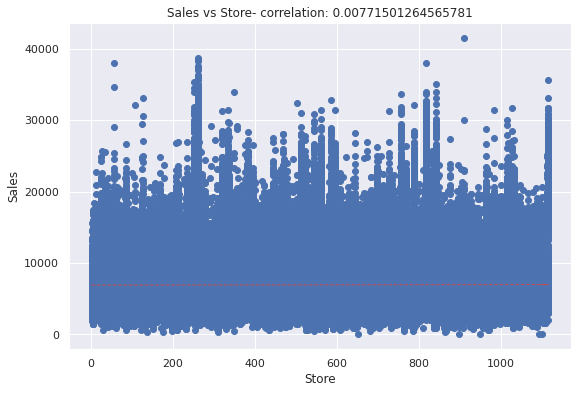

In [320]:
for col in nf[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Sales'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

Using Multiple Linear Regression

In [321]:
df.count()

index            844340
Store            844340
DayOfWeek        844340
Date             844340
Sales            844340
Customers        844340
Open             844340
Promo            844340
StateHoliday     844340
SchoolHoliday    844340
dtype: int64

In [322]:
X = df[["Customers","Open","Promo","DayOfWeek"]]
y = df[["Sales"]]

In [323]:
df.isna().values.any()

False

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675472, 4)
(168868, 4)


In [325]:
clf = LinearRegression()

In [326]:
clf.fit(X_train,y_train)

LinearRegression()

In [327]:
clf.score(X_train,y_train)

0.7285314680438126

In [328]:
y_pred = clf.predict(X_test)
y_pred

array([[ 4693.11000861],
       [ 4996.70423094],
       [ 7740.78733413],
       ...,
       [ 4257.99925723],
       [ 7454.6309604 ],
       [12894.91572642]])

In [338]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2609627.607998777

In [335]:
clf.score(X_test,y_test)

0.7297101224405167